In [257]:
# Downloading the data
!curl -L -O "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/review_categories/All_Beauty.jsonl"
!curl -L -O "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_All_Beauty.jsonl"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1110  100  1110    0     0   5414      0 --:--:-- --:--:-- --:--:--  5441
100  311M  100  311M    0     0  37.9M      0  0:00:08  0:00:08 --:--:-- 26.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1130  100  1130    0     0   7077      0 --:--:-- --:--:-- --:--:--  7106
100  203M  100  203M    0     0  59.2M      0  0:00:03  0:00:03 --:--:-- 71.4M


In [258]:
# Installing the required libraries
!pip install numpy pandas matplotlib seaborn

In [259]:
# Importing libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from wordcloud import WordCloud

In [260]:
# Loading reviews & metadata
reviews = pd.read_json("All_Beauty.jsonl", lines=True)
meta = pd.read_json("meta_All_Beauty.jsonl", lines=True)

In [261]:
# Displaying the first few rows of the reviews dataframe
reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


In [262]:
# Displaying the information about the reviews dataframe
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             701528 non-null  int64         
 1   title              701528 non-null  object        
 2   text               701528 non-null  object        
 3   images             701528 non-null  object        
 4   asin               701528 non-null  object        
 5   parent_asin        701528 non-null  object        
 6   user_id            701528 non-null  object        
 7   timestamp          701528 non-null  datetime64[ns]
 8   helpful_vote       701528 non-null  int64         
 9   verified_purchase  701528 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 48.8+ MB


In [263]:
# Displaying the first few rows of the meta dataframe
meta.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,NaN
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,NaN
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,NaN
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,NaN
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,NaN


In [264]:
# Displaying the information about the meta dataframe
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    112590 non-null  object 
 1   title            112590 non-null  object 
 2   average_rating   112590 non-null  float64
 3   rating_number    112590 non-null  int64  
 4   features         112590 non-null  object 
 5   description      112590 non-null  object 
 6   price            17704 non-null   float64
 7   images           112590 non-null  object 
 8   videos           112590 non-null  object 
 9   store            101259 non-null  object 
 10  categories       112590 non-null  object 
 11  details          112590 non-null  object 
 12  parent_asin      112590 non-null  object 
 13  bought_together  0 non-null       float64
dtypes: float64(3), int64(1), object(10)
memory usage: 12.0+ MB


In [265]:
# Displaying the shape of the dataframes
print(f"Reviews shape: {reviews.shape}")
print(f"Meta shape: {meta.shape}")

Reviews shape: (701528, 10)
Meta shape: (112590, 14)


In [266]:
# Displaying the number of unique values in each column of the reviews dataframe
print("Unique values in reviews dataframe:")
for col in reviews.columns:
    try:
        print(f"{col}: {reviews[col].nunique()}")
    except TypeError as e:
        print(f"{col}: Could not calculate unique values due to error: {e}")

Unique values in reviews dataframe:
rating: 5
title: 376394
text: 643629
images: Could not calculate unique values due to error: unhashable type: 'list'
asin: 115709
parent_asin: 112565
user_id: 631986
timestamp: 694027
helpful_vote: 240
verified_purchase: 2


In [267]:
# Displaying the number of unique values in each column of the meta dataframe
print("Unique values in meta dataframe:")
for col in meta.columns:
    try:
        print(f"{col}: {meta[col].nunique()}")
    except TypeError as e:
        print(f"{col}: Could not calculate unique values due to error: {e}")

Unique values in meta dataframe:
main_category: 2
title: 110566
average_rating: 41
rating_number: 1452
features: Could not calculate unique values due to error: unhashable type: 'list'
description: Could not calculate unique values due to error: unhashable type: 'list'
price: 3531
images: Could not calculate unique values due to error: unhashable type: 'list'
videos: Could not calculate unique values due to error: unhashable type: 'list'
store: 30765
categories: Could not calculate unique values due to error: unhashable type: 'list'
details: Could not calculate unique values due to error: unhashable type: 'dict'
parent_asin: 112590
bought_together: 0


In [268]:
# Printing the columns of the Reviews dataframe
reviews.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [269]:
# Printing the columns of the meta dataframe
meta.columns

Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together'],
      dtype='object')

In [270]:
# Merging the two dataframes on 'parent_asin'
# Using a left merge to keep all reviews and add corresponding metadata where available
AmazonData = pd.merge(reviews, meta, on='parent_asin', how='left')

In [271]:
# Displaying information about the combined dataframe
AmazonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             701528 non-null  int64         
 1   title_x            701528 non-null  object        
 2   text               701528 non-null  object        
 3   images_x           701528 non-null  object        
 4   asin               701528 non-null  object        
 5   parent_asin        701528 non-null  object        
 6   user_id            701528 non-null  object        
 7   timestamp          701528 non-null  datetime64[ns]
 8   helpful_vote       701528 non-null  int64         
 9   verified_purchase  701528 non-null  bool          
 10  main_category      701528 non-null  object        
 11  title_y            701528 non-null  object        
 12  average_rating     701528 non-null  float64       
 13  rating_number      701528 non-null  int64   

In [272]:
# Checking missing values of the combined data
AmazonData.isnull().sum()

,0
rating,0
title_x,0
text,0
images_x,0
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0


In [273]:
# Creating a working copy of the combined dataset
df = AmazonData.copy()

In [274]:
# Droping completely useless column
df.drop(columns=['bought_together'], inplace=True)

In [275]:
# Filling missing prices with the median
df['price'] = df['price'].fillna(df['price'].median())

In [276]:
# Filling missing 'store' with 'Unknown'
df['store'] = df['store'].fillna('Unknown')

In [277]:
# Verifying missing values after handling them
df.isnull().sum()

,0
rating,0
title_x,0
text,0
images_x,0
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0


In [278]:
# Moving cleaned data to AmazonData
AmazonData = df.copy()

In [279]:
# Analysing updated cleaned data information
AmazonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             701528 non-null  int64         
 1   title_x            701528 non-null  object        
 2   text               701528 non-null  object        
 3   images_x           701528 non-null  object        
 4   asin               701528 non-null  object        
 5   parent_asin        701528 non-null  object        
 6   user_id            701528 non-null  object        
 7   timestamp          701528 non-null  datetime64[ns]
 8   helpful_vote       701528 non-null  int64         
 9   verified_purchase  701528 non-null  bool          
 10  main_category      701528 non-null  object        
 11  title_y            701528 non-null  object        
 12  average_rating     701528 non-null  float64       
 13  rating_number      701528 non-null  int64   

In [280]:
# Printing the updated cleaned data columns
AmazonData.columns

Index(['rating', 'title_x', 'text', 'images_x', 'asin', 'parent_asin',
       'user_id', 'timestamp', 'helpful_vote', 'verified_purchase',
       'main_category', 'title_y', 'average_rating', 'rating_number',
       'features', 'description', 'price', 'images_y', 'videos', 'store',
       'categories', 'details'],
      dtype='object')

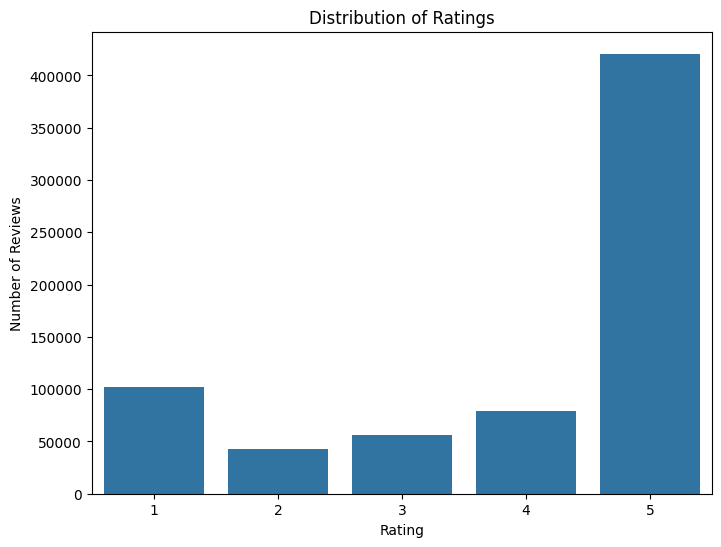

In [281]:
# Analysing the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=AmazonData)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

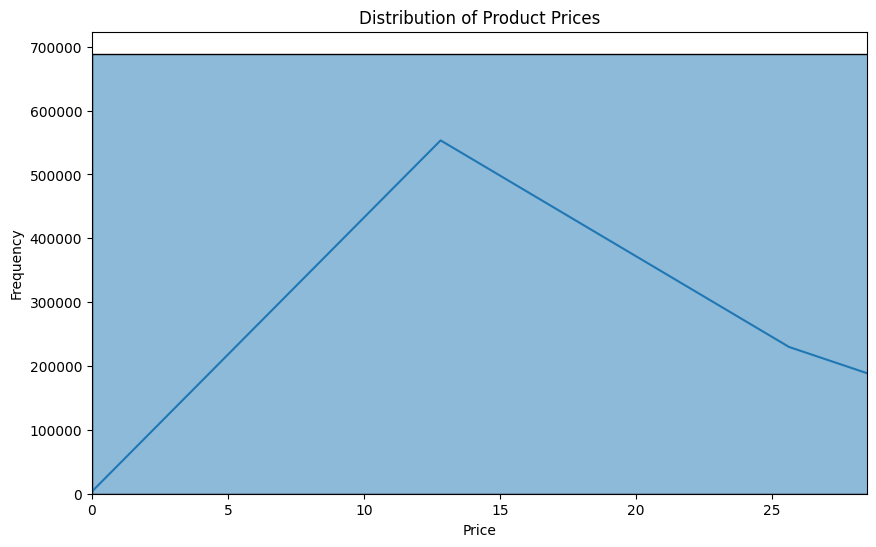

In [282]:
# Visualising the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(AmazonData['price'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, AmazonData['price'].quantile(0.95))
plt.show()

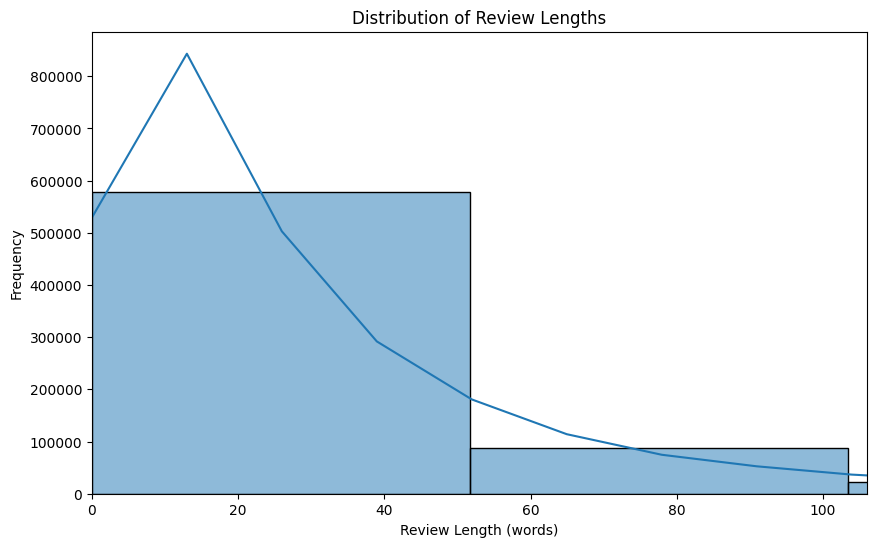

In [283]:
# Plotting the distribution of review lengths (word count)
AmazonData['review_length'] = AmazonData['text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
plt.figure(figsize=(10, 6))
sns.histplot(AmazonData['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.xlim(0, AmazonData['review_length'].quantile(0.95))
plt.show()

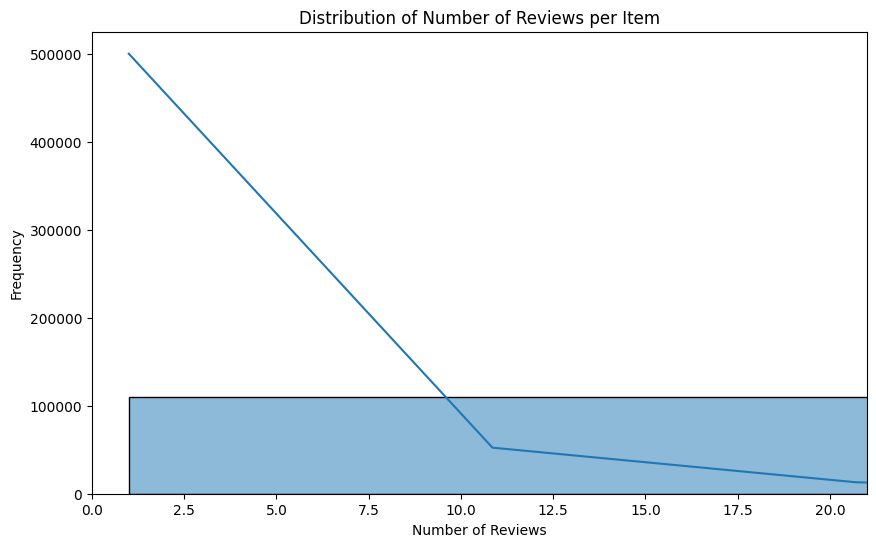

In [284]:
# Analysing the number of reviews per item
reviews_per_item = AmazonData['parent_asin'].value_counts().reset_index()
reviews_per_item.columns = ['parent_asin', 'review_count']
plt.figure(figsize=(10, 6))
sns.histplot(reviews_per_item['review_count'], bins=50, kde=True)
plt.title('Distribution of Number of Reviews per Item')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xlim(0, reviews_per_item['review_count'].quantile(0.95))
plt.show()

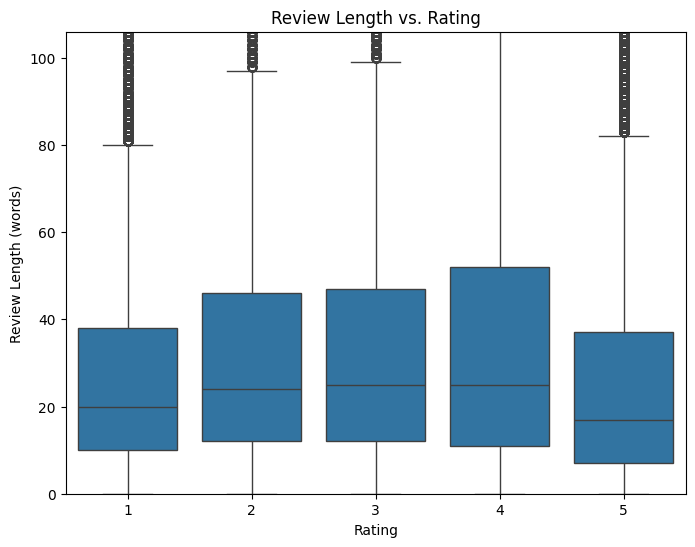

In [285]:
# Visualising the relationship between rating and review length
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='review_length', data=AmazonData)
plt.title('Review Length vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (words)')
plt.ylim(0, AmazonData['review_length'].quantile(0.95))
plt.show()

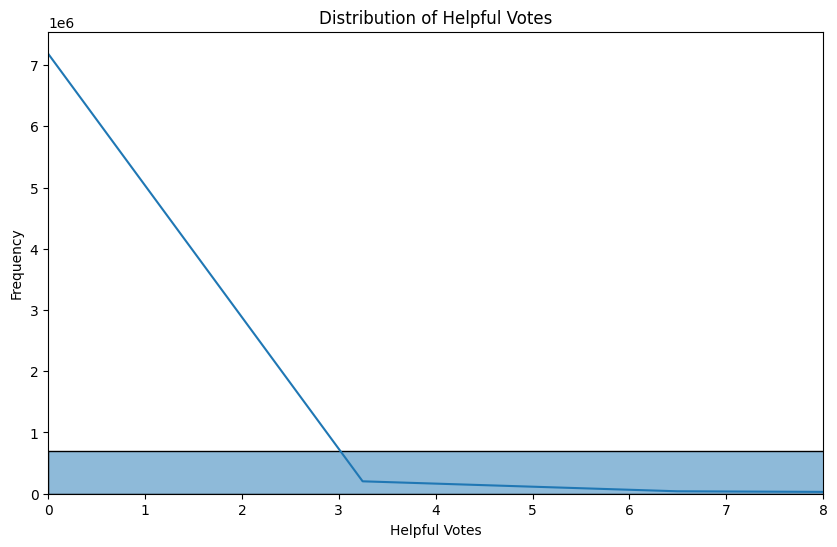

In [286]:
# Analyzing helpful votes distribution
plt.figure(figsize=(10, 6))
sns.histplot(AmazonData['helpful_vote'], bins=50, kde=True)
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.xlim(0, AmazonData['helpful_vote'].quantile(0.98))
plt.show()

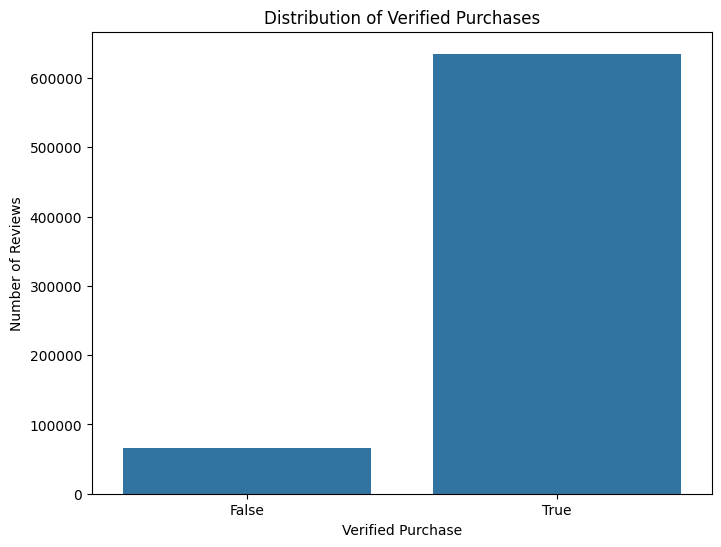

In [287]:
# Analyzing the distribution of verified purchases
plt.figure(figsize=(8, 6))
sns.countplot(x='verified_purchase', data=AmazonData)
plt.title('Distribution of Verified Purchases')
plt.xlabel('Verified Purchase')
plt.ylabel('Number of Reviews')
plt.show()

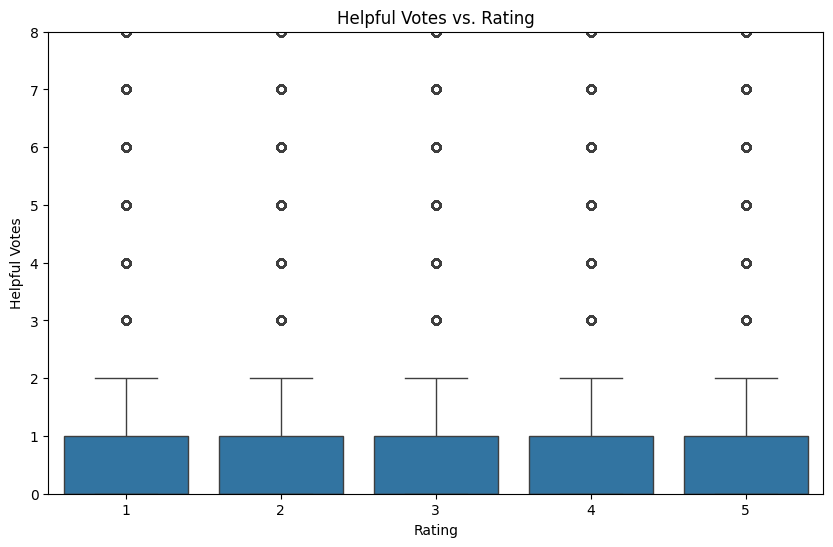

In [288]:
# Visualizing the relationship between rating and helpful votes
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='helpful_vote', data=AmazonData)
plt.title('Helpful Votes vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Helpful Votes')
plt.ylim(0, AmazonData['helpful_vote'].quantile(0.98)) # Limiting y-axis for better visualization
plt.show()

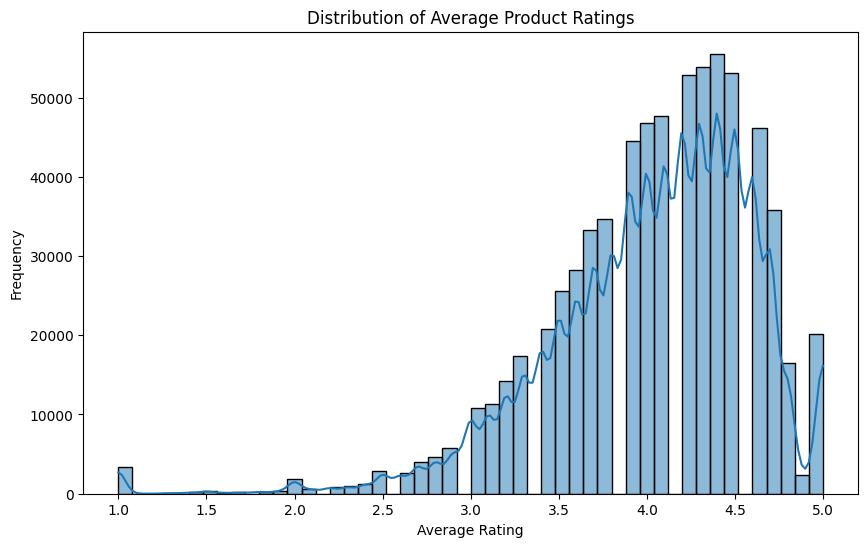

In [289]:
# Visualizing the distribution of average product ratings
plt.figure(figsize=(10, 6))
sns.histplot(AmazonData['average_rating'], bins=50, kde=True)
plt.title('Distribution of Average Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

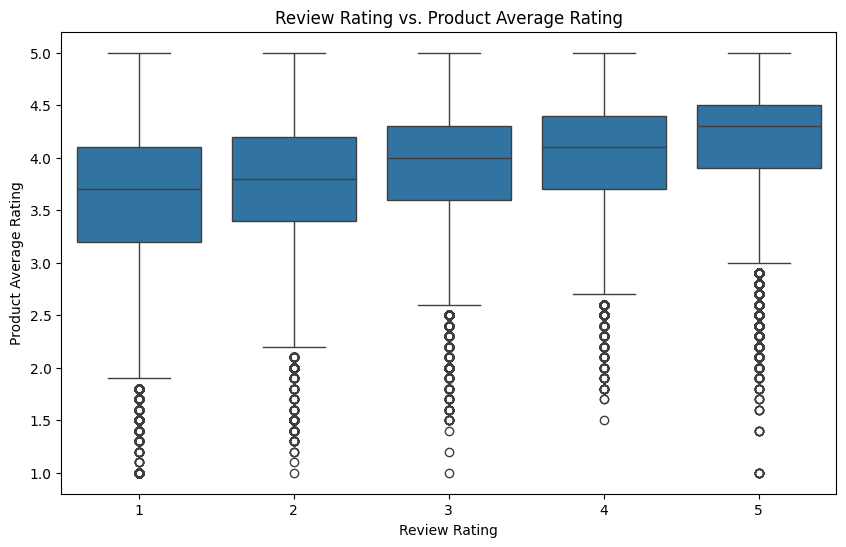

In [290]:
# Visualizing the relationship between review rating and product average rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='average_rating', data=AmazonData)
plt.title('Review Rating vs. Product Average Rating')
plt.xlabel('Review Rating')
plt.ylabel('Product Average Rating')
plt.show()

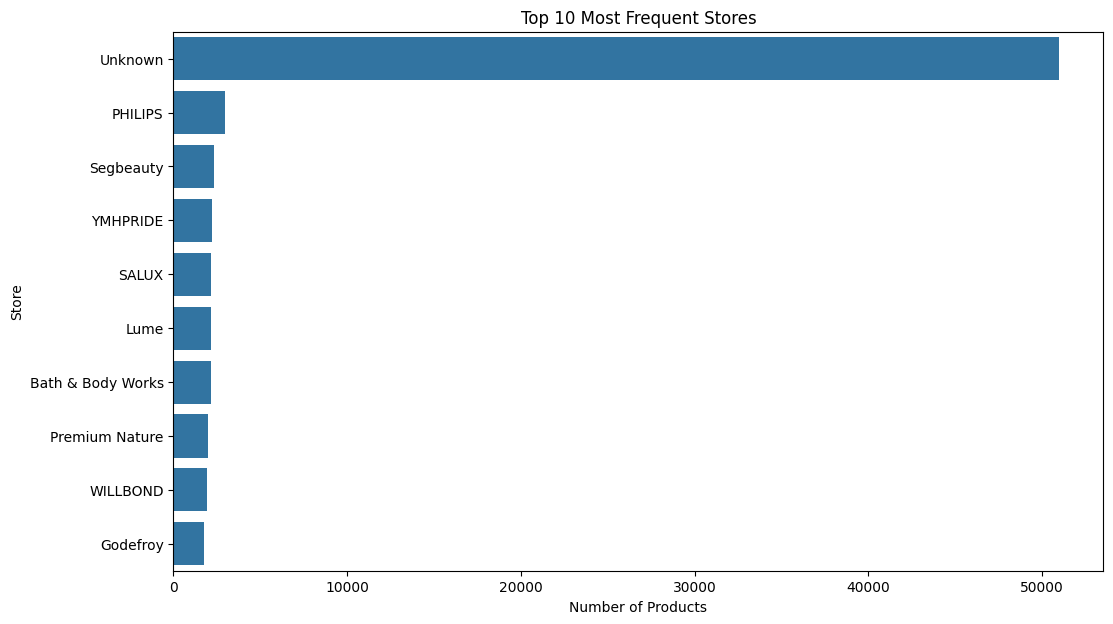

In [291]:
# Visualizing the top 10 most frequent stores
plt.figure(figsize=(12, 7))
sns.countplot(y='store', data=AmazonData, order=AmazonData['store'].value_counts().nlargest(10).index)
plt.title('Top 10 Most Frequent Stores')
plt.xlabel('Number of Products')
plt.ylabel('Store')
plt.show()

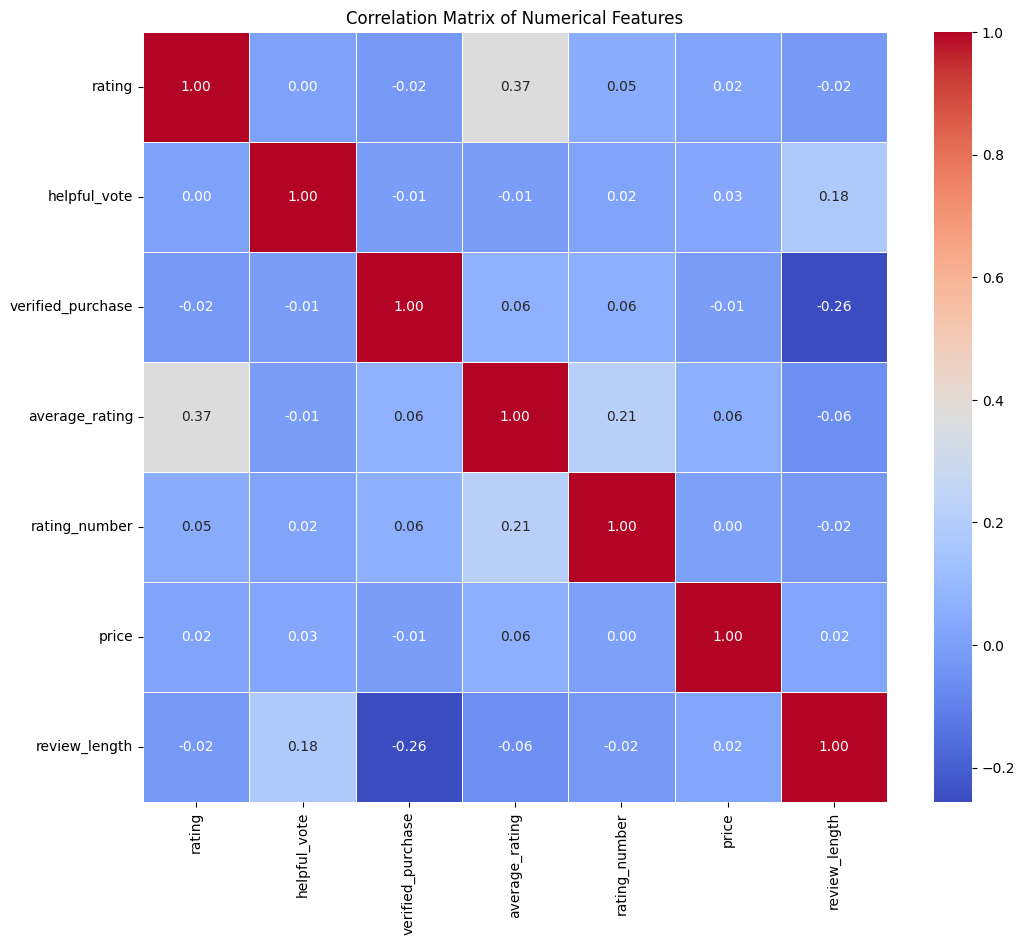

In [292]:
# Calculating and plotting the correlation matrix
correlation_matrix = AmazonData.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [293]:
# Ensuring text fields aren't too short or low quality
AmazonData['text'] = AmazonData['text'].fillna('')
AmazonData['title_y'] = AmazonData['title_y'].fillna('')
AmazonData = AmazonData[(AmazonData['text'].str.len() > 30) & (AmazonData['title_y'].str.len() > 10)]

In [294]:
# Preparing a filtered dataset
interactions = AmazonData[['user_id', 'asin', 'rating']]
interactions = interactions[interactions['user_id'].notnull() & interactions['asin'].notnull()]

In [295]:
# Limiting top products with the most reviews
topAsins = interactions['asin'].value_counts().nlargest(5000).index
filterData = AmazonData[AmazonData['asin'].isin(topAsins)].copy()

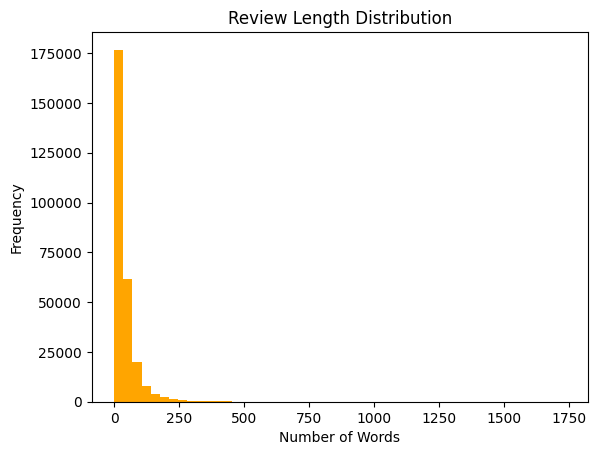

In [296]:
# Calculating Review Length Distribution
filterData['review_length'] = filterData['text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
plt.hist(filterData['review_length'], bins=50, color='orange')
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [297]:
# Keeping only one record per ASIN
filterUniqueData = filterData.drop_duplicates(subset='asin').reset_index(drop=True)

In [298]:
# Rebuilding the asin index after reset
asinIndex = pd.Series(filterUniqueData.index, index=filterUniqueData['asin']).dropna()

In [299]:
# Combining title and text for better features
filterUniqueData['combined_text'] = (filterUniqueData['title_y'] + ' ' +
                                     filterUniqueData['text'])


In [300]:
# TF-IDF matrix Vectorisation
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidfMatrix = tfidf.fit_transform(filterUniqueData['combined_text'])

In [301]:
# Fitting Nearest Neighbors model on TF-IDF vectors
NNmodel = NearestNeighbors(metric='cosine', algorithm='brute')
NNmodel.fit(tfidfMatrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [302]:
# Getting top 10 similar products for a index
distances, indices = NNmodel.kneighbors(tfidfMatrix[0], n_neighbors=10)

In [303]:
# Printing top similar items for item 0
similarItems = filterUniqueData.iloc[indices[0]]
print(similarItems[['asin', 'title_y']])

            asin                                            title_y
0     B00YQ6X8EO  Herbivore - Natural Sea Mist Texturizing Salt ...
20    B015RR870U  Herbivore - Natural Sea Mist Texturizing Salt ...
3453  B01CGU4T2G  Captain Blankenship Golden Waves Shimmer Sea S...
3515  B01M5K6IBJ  Scruples High Definition Hair Spray for Men & ...
302   B07THLR7RR  LANGE HAIR Extendé Conditioning Detangler Hair...
4015  B07RNJ1DM6  4 Pieces Travel Spray Bottles Mist Spray Bottl...
279   B08D6WBXD7  Atlas Semi Matte Texture Putty | Medium Shine ...
2378  B08548NDTM  Naturium Niacinamide Skin Mist 2% Plus Hyaluro...
2026  B07H8VF1WT  TIGI COPYRIGHT CUSTOM COMPLETE VOLUME FINISHIN...
4386  B075RQW495  DESIGNLINE Interrupt Texturizing Clay, 2 oz - ...


In [304]:
# Defining a funtion to provide Recommendation
def getRecommendations(asin_id, top_n=5):
    if asin_id not in asinIndex:
        # Fallback: return top N most-reviewed products
        top_products = filterData.sort_values(by='totalReviews', ascending=False).head(top_n)
        return top_products[['asin', 'title']]
        return f"ASIN '{asin_id}' not found in dataset."
    idx = asinIndex[asin_id]
    query_vec = tfidfMatrix[idx]
    distances, indices = NNmodel.kneighbors(query_vec, n_neighbors=top_n + 10)  # request more than needed
    rec_indices = indices.flatten()[1:]  # skip self
    # Removing duplicates by ASIN
    seen = set()
    recs = []
    for i in rec_indices:
        asin = filterUniqueData.iloc[i]['asin']
        title = filterUniqueData.iloc[i]['title_y']
        if asin not in seen:
            seen.add(asin)
            recs.append((asin, title))
        if len(recs) == top_n:
            break
    return pd.DataFrame(recs, columns=['ASIN', 'Recommended Title'])

In [305]:
# Getting some recommendation of an indexed ASIN from filtered data
sampleAsin = filterUniqueData['asin'].iloc[10]
getRecommendations(sampleAsin, top_n=5)

,ASIN,Recommended Title
0,B08ZRYWRSQ,Under eye bags easy to use for men and women
1,B01683P5AC,EMI Medical Nylon 5 Pocket Nurse Scrub Organiz...
2,B01850QOWE,"Beard Comb, Natural Wood Mustache Comb with Fi..."
3,B000050FDE,Oral-B Professional Care 1000 Power Toothbrush
4,B012RUJLU0,"Grand Prime Case, LK Galaxy Grand Prime Wallet..."


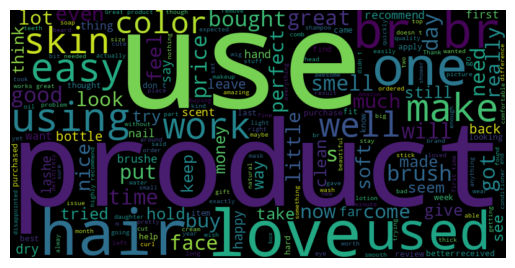

In [306]:
# Plotting the TF-IDF feature importance word cloud
text = " ".join(filterData['text'])
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [307]:
# Saving the model for reusing later
pickle.dump(tfidf, open("tfidfVectorizer.pkl", "wb"))